In [76]:
import numpy as np

mean_1 = np.array([2,3])
mean_2 = np.array([-2,2])
mean_3 = np.array([3,-1])

cov_1 = np.array([[1, 0.8], [0.8, 1]])
cov_2 = np.array([[0.5, -0.3], [-0.3, 0.5]])
cov_3 = np.array([[1, -0.1], [-0.1, 1]])

In [77]:
data_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
data_2 = np.random.multivariate_normal(mean_2, cov_2, 100)
data_3 = np.random.multivariate_normal(mean_3, cov_3, 100)


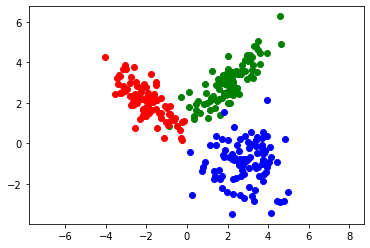

In [78]:
import matplotlib.pyplot as plt

plt.plot(data_1[:,0],data_1[:,1], 'o', color='green')
plt.plot(data_2[:,0],data_2[:,1], 'o', color='red')
plt.plot(data_3[:,0],data_3[:,1], 'o', color='blue')
plt.axis('equal')
plt.show()

In [171]:
import random

def k_means(data, k, max_iter=1000):
    means = []
    for i in range(0,k):
        means.append(data[random.randint(0,data.shape[0]-1)])
        #means.append(data[random.randint(0,3-1)])
    error = 100
    step = 0
    c = np.zeros((data.shape[0],))
    while  step < max_iter:
        counter = np.zeros((k,))
        index_list = []
        for i in range(0,k):
            index_list.append([])
        for i in range(0,data.shape[0]):
            for j, mean in enumerate(means, 0):
                if j == 0:
                    argmin = j
                    minimum = np.linalg.norm(data[i]-mean)
                else:
                    if np.linalg.norm(data[i]-mean) < minimum:
                        minimum = np.linalg.norm(data[i]-mean)
                        argmin = j
            c[i] = argmin
            counter[argmin] += 1
            index_list[argmin].append(i)
        for j, mean in enumerate(means, 0):
            sum_ = np.zeros((data.shape[1],))
            for index in index_list[j]:
                sum_ += data[index]
            means[j] = sum_/counter[j]
        step += 1
        #plt.plot(data[0:100,0],data[0:100,1], 'o', color='green')
        #plt.plot(data[100:200,0],data[100:200,1], 'o', color='red')
        #plt.plot(data[200:300,0],data[200:300,1], 'o', color='blue')
        #plt.plot(np.array(means)[:,0],np.array(means)[:,1], 'x', color='black')
        #plt.show()
    return (np.array(means),index_list)

In [172]:
data = np.vstack((np.vstack((data_1,data_2)),data_3))


In [ ]:
means, class_list = k_means(data, 3, max_iter=20)

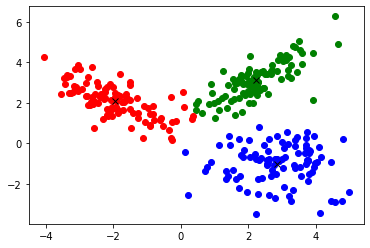

In [176]:

for j, lis in enumerate(class_list, 0):
    for index in lis:
        if j == 0:
            plt.plot(data[index,0],data[index,1], 'o', color='blue')
        elif j == 1:
            plt.plot(data[index,0],data[index,1], 'o', color='green')
        else:
            plt.plot(data[index,0],data[index,1], 'o', color='red')
plt.plot(np.array(means)[:,0],np.array(means)[:,1], 'x', color='black')
plt.savefig('k_means+classes.pdf')

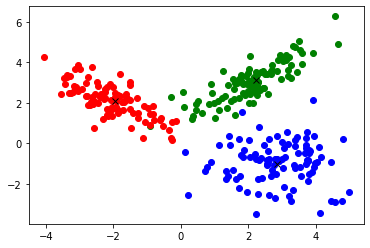

In [178]:

plt.plot(data_1[:,0],data_1[:,1], 'o', color='green')
plt.plot(data_2[:,0],data_2[:,1], 'o', color='red')
plt.plot(data_3[:,0],data_3[:,1], 'o', color='blue')
plt.plot(means[:,0],means[:,1], 'x', color='black')

plt.savefig('k_means.pdf')